In [3]:
import os

In [6]:
rootDir = "CCSN_v2"

subDirs = []

for item in os.listdir(rootDir):
    item_path = os.path.join(rootDir, item)
    if os.path.isdir(item_path):
        subDirs.append(item)

print(len(subDirs))
subDirs


11


['Ac', 'As', 'Cb', 'Cc', 'Ci', 'Cs', 'Ct', 'Cu', 'Ns', 'Sc', 'St']

In [7]:
name_mapping = {
    "Ci": "cirrus",
    "Cs": "cirrostratus",
    "Cc": "cirrocumulus",
    "Ac": "altocumulus",
    "As": "altostratus",
    "Cu": "cumulus",
    "Cb": "cumulonimbus",
    "Ns": "nimbostratus",
    "Sc": "stratocumulus",
    "St": "stratus",
    "Ct": "contrail"
}

for item in os.listdir(rootDir):
    item_path = os.path.join(rootDir, item)
    if os.path.isdir(item_path) and item in name_mapping:
        new_name = name_mapping[item]
        new_path = os.path.join(rootDir, new_name)
        os.rename(item_path, new_path)
        print(f'Renamed "{item}" to "{new_name}"')

Renamed "Ac" to "altocumulus"
Renamed "As" to "altostratus"
Renamed "Cb" to "cumulonimbus"
Renamed "Cc" to "cirrocumulus"
Renamed "Ci" to "cirrus"
Renamed "Cs" to "cirrostratus"
Renamed "Ct" to "contrail"
Renamed "Cu" to "cumulus"
Renamed "Ns" to "nimbostratus"
Renamed "Sc" to "stratocumulus"
Renamed "St" to "stratus"


In [10]:
subDirs.clear()

for item in os.listdir(rootDir):
    item_path = os.path.join(rootDir, item)
    if os.path.isdir(item_path):
        subDirs.append(item)

subDirs

['altocumulus',
 'altostratus',
 'cirrocumulus',
 'cirrostratus',
 'cirrus',
 'contrail',
 'cumulonimbus',
 'cumulus',
 'nimbostratus',
 'stratocumulus',
 'stratus']

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
img_width, img_height = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  
)

train_generator = train_datagen.flow_from_directory(
    rootDir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  
)

validation_generator = train_datagen.flow_from_directory(
    rootDir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation' 
)

Found 2039 images belonging to 11 classes.
Found 504 images belonging to 11 classes.


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

img_width, img_height = 150, 150

num_classes = len(train_generator.class_indices)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [19]:
epochs = 20

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)


Epoch 1/20
63/63 [==============================] - 68s 1s/step - loss: 2.3082 - accuracy: 0.1674 - val_loss: 2.0445 - val_accuracy: 0.2417
Epoch 2/20
63/63 [==============================] - 47s 736ms/step - loss: 2.1479 - accuracy: 0.2277 - val_loss: 2.0426 - val_accuracy: 0.2229
Epoch 3/20
63/63 [==============================] - 51s 814ms/step - loss: 2.0832 - accuracy: 0.2591 - val_loss: 1.9972 - val_accuracy: 0.2875
Epoch 4/20
63/63 [==============================] - 54s 860ms/step - loss: 2.0230 - accuracy: 0.2970 - val_loss: 2.0035 - val_accuracy: 0.2750
Epoch 5/20
63/63 [==============================] - 83s 1s/step - loss: 1.9266 - accuracy: 0.3398 - val_loss: 1.9480 - val_accuracy: 0.3146
Epoch 6/20
63/63 [==============================] - 100s 2s/step - loss: 1.8828 - accuracy: 0.3572 - val_loss: 1.9799 - val_accuracy: 0.2917
Epoch 7/20
63/63 [==============================] - 90s 1s/step - loss: 1.8352 - accuracy: 0.3787 - val_loss: 2.0789 - val_accuracy: 0.2833
Epoch 8/20

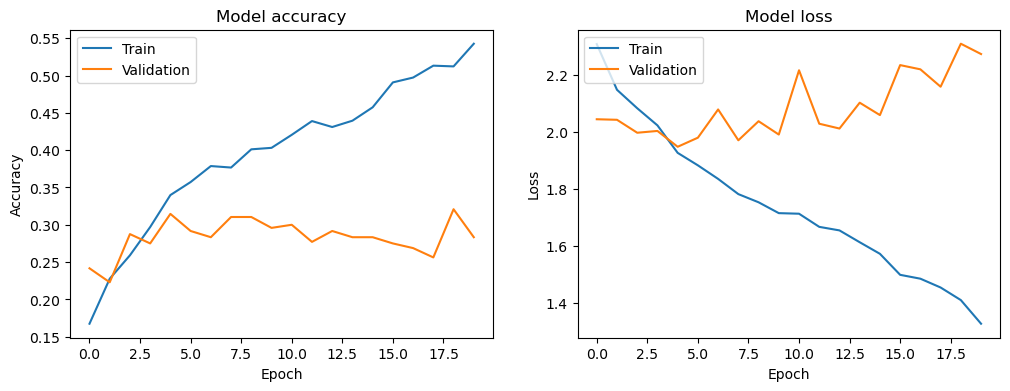

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
model.save('../models/cloud_classification_model_1.keras')